PCA concatenation

Training Metrics:
MAE: 0.44942453427769874
MSE: 0.5227030681316084
RMSE: 0.7229820662586371
MAPE: 9.384721099027606
R2: 0.9104291814742249

Testing Metrics:
MAE: 1.2684988787776101
MSE: 2.603237478055679
RMSE: 1.613455136672749
MAPE: 33.712991810383116
R2: 0.565923124672165


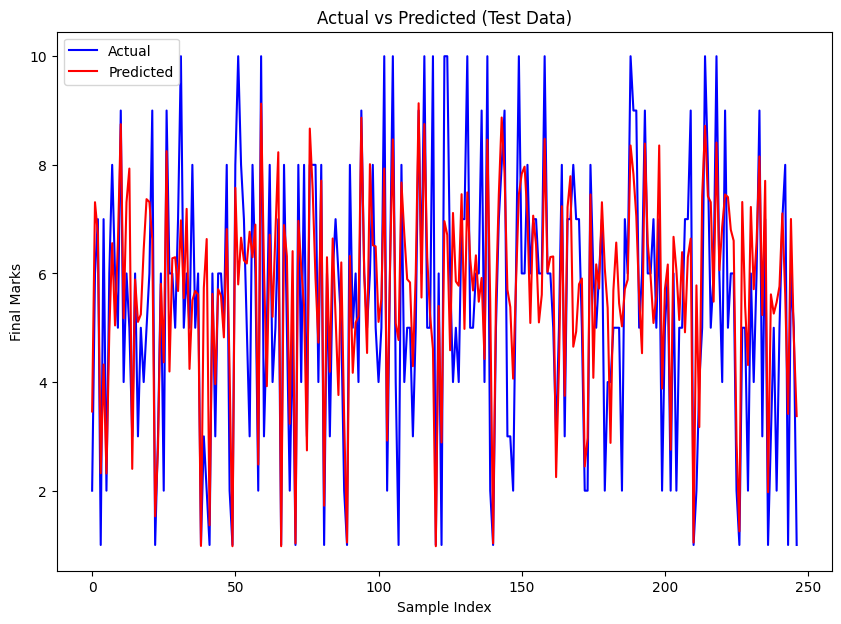

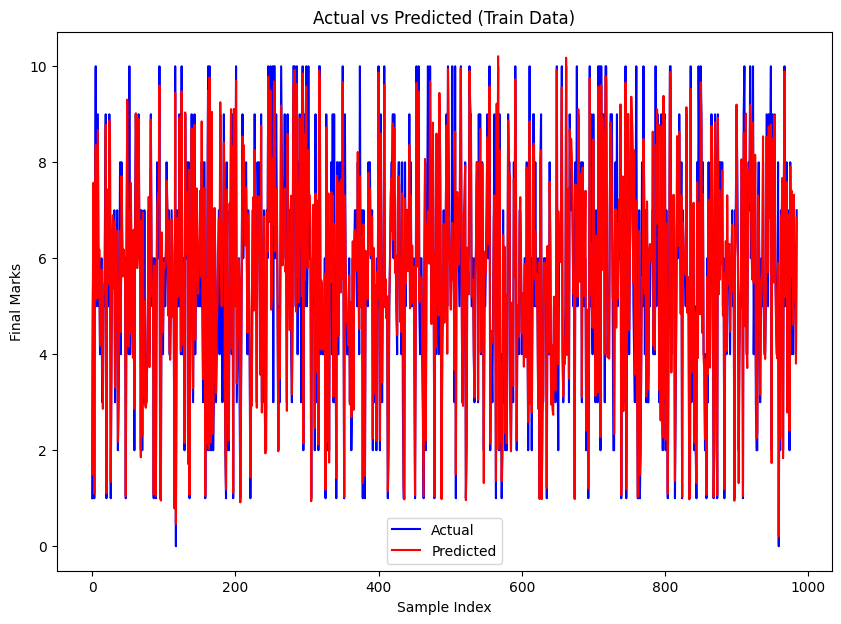

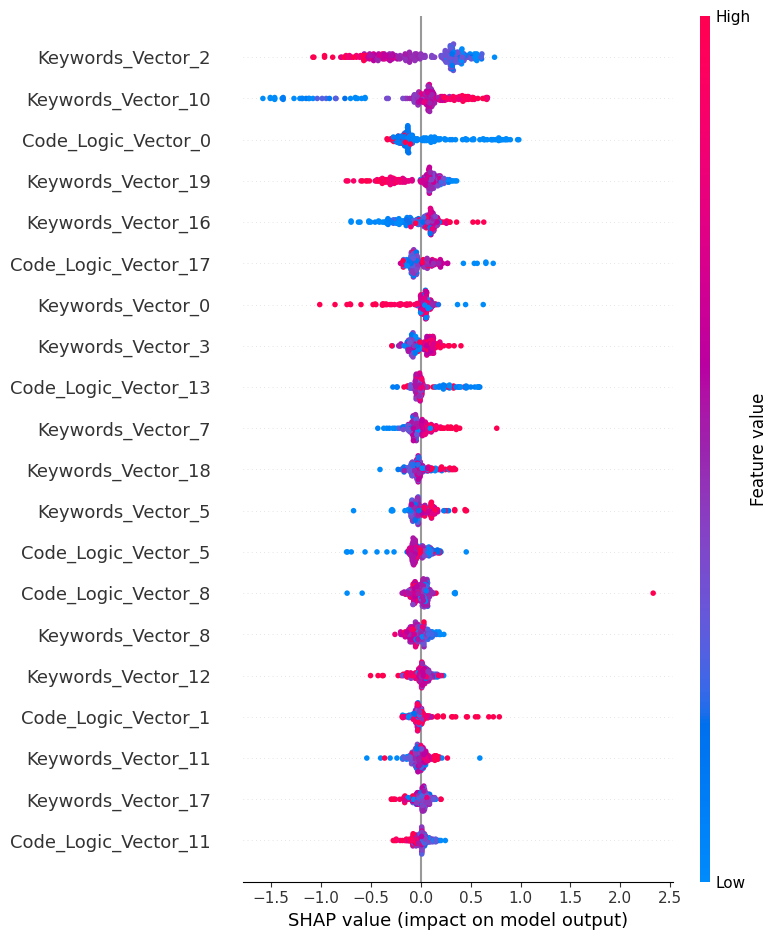

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from math import sqrt
import shap
from lime.lime_tabular import LimeTabularExplainer

# Load the PCA dataset
file_path = 'pca2.xlsx'  h
df = pd.read_excel(file_path)

# Extract features and target from the dataframe
keywords_columns = [col for col in df.columns if "Keywords_Vector_" in col]
custom_data_columns = [col for col in df.columns if "Code_Logic_Vector_" in col]
target_column = 'Final_Marks'  # Replace with your actual target column name

X_keywords = df[keywords_columns].values
X_custom_data = df[custom_data_columns].values
y = df[target_column].values

X_keywords_scaled = 0.9 * X_keywords  # Keywords scaled by 0.9
X_custom_data_scaled = 0.1 * X_custom_data  # Custom Data Structures scaled by 0.1

# Concatenate the two scaled datasets
X_scaled = np.hstack([X_keywords_scaled, X_custom_data_scaled])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def safe_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    nonzero_indices = y_true != 0  # Exclude zero values from calculation
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
# Initialize the CatBoost Regressor with the given hyperparameters
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    verbose=0
)

# Fit the model
model.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = safe_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = safe_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 7))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Train Data
plt.figure(figsize=(10, 7))
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Train Data)')
plt.legend()
plt.show()

# SHAP - Model Explanation
# Explain the model with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])

# LIME - Local Explanation for Regression
# Create a LIME explainer object for regression (ensure regression mode is used)
explainer_lime = LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns[:-1],
    mode='regression'  # Specify that it's a regression model
)

# Choose a test instance to explain
i = 1  # Just choose the first instance, you can loop through others
explanation = explainer_lime.explain_instance(X_test[i], model.predict)

# Show the LIME explanation for this instance
explanation.show_in_notebook()



PCA Addition

Training Metrics:
MAE: 0.5532631789168178
MSE: 0.6386795489617603
RMSE: 0.7991742919800162
MAPE: 11.825397456447787
R2: 0.8905553583592628

Testing Metrics:
MAE: 1.3077503560769648
MSE: 2.8800605695706665
RMSE: 1.697074120234784
MAPE: 35.323045578269316
R2: 0.5197642538060446


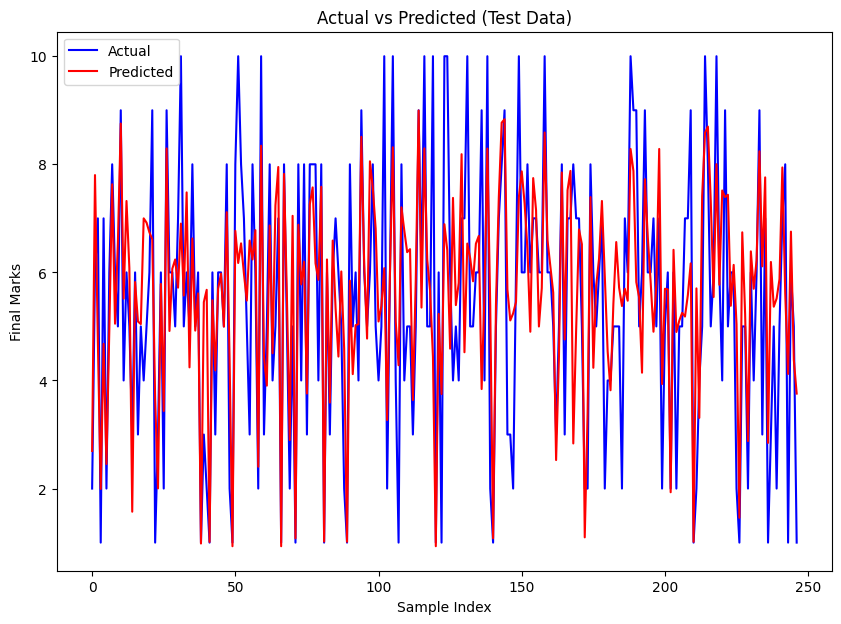

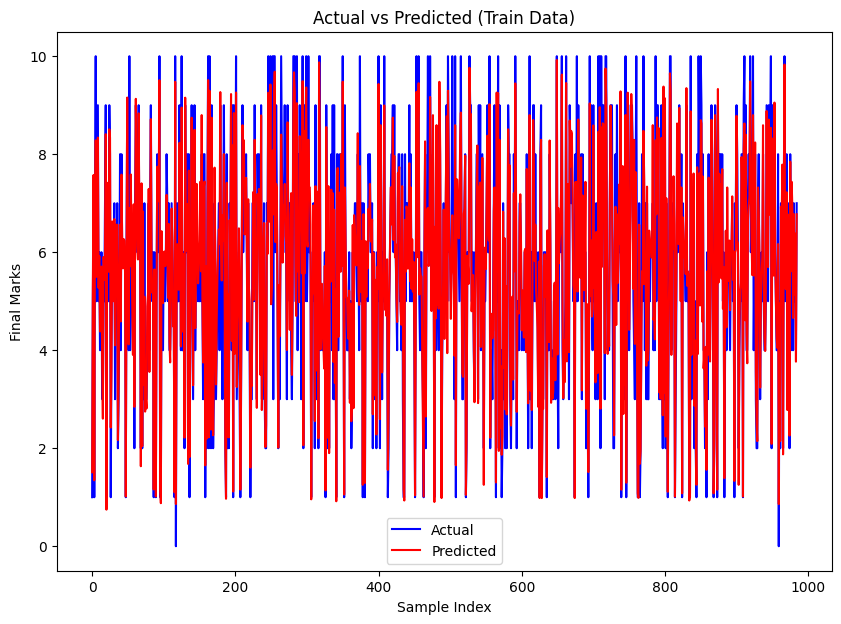

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

# Load the PCA dataset
file_path = 'pca.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Extract features and target from the dataframe
keywords_columns = [col for col in df.columns if "Keywords_Vector_" in col]
custom_data_columns = [col for col in df.columns if "Custom_Data_Structures_Vector_" in col]
target_column = 'Final_Marks'  # Replace with your actual target column name

X_keywords = df[keywords_columns].values
X_custom_data = df[custom_data_columns].values
y = df[target_column].values

X_keywords_scaled = 0.9 * X_keywords  # Keywords scaled by 0.9
X_custom_data_scaled = 0.1 * X_custom_data  # Custom Data Structures scaled by 0.1

# Concatenate the two scaled datasets (Addition Fusion)
X_scaled = X_keywords_scaled + X_custom_data_scaled  # Addition Fusion

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor with the given hyperparameters
model = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    verbose=0
)

def safe_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    nonzero_indices = y_true != 0  # Exclude zero values from calculation
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
# Fit the model
model.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = safe_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = safe_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 7))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Train Data
plt.figure(figsize=(10, 7))
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Train Data)')
plt.legend()
plt.show()


Training Metrics:
MAE: 0.5123007826427766
MSE: 0.5820975557815015
RMSE: 0.7629531805959665
MAPE: 11.06440764676383
R2: 0.9002512942585706

Testing Metrics:
MAE: 1.3932373011111825
MSE: 3.177763745248403
RMSE: 1.7826283250437829
MAPE: 36.896390887533094
R2: 0.47012373296893584


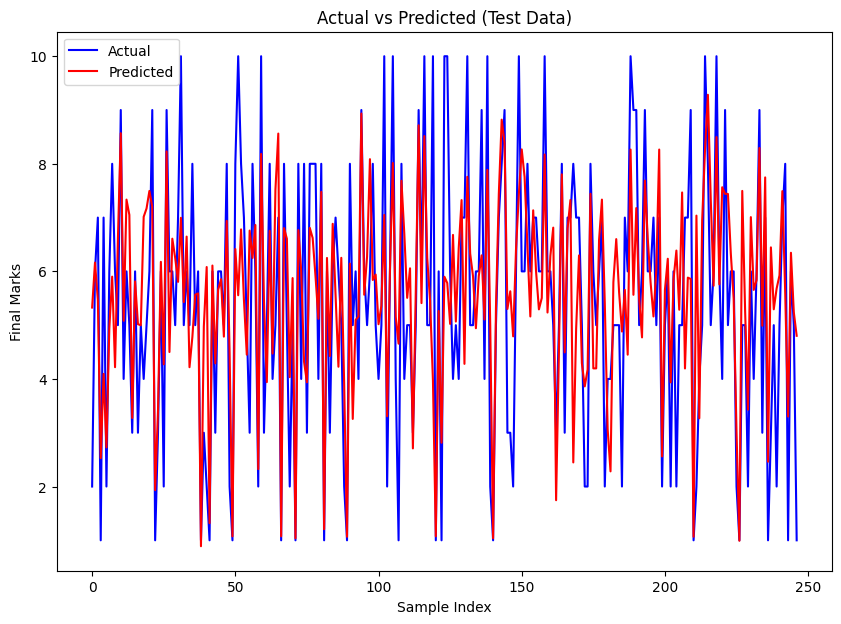

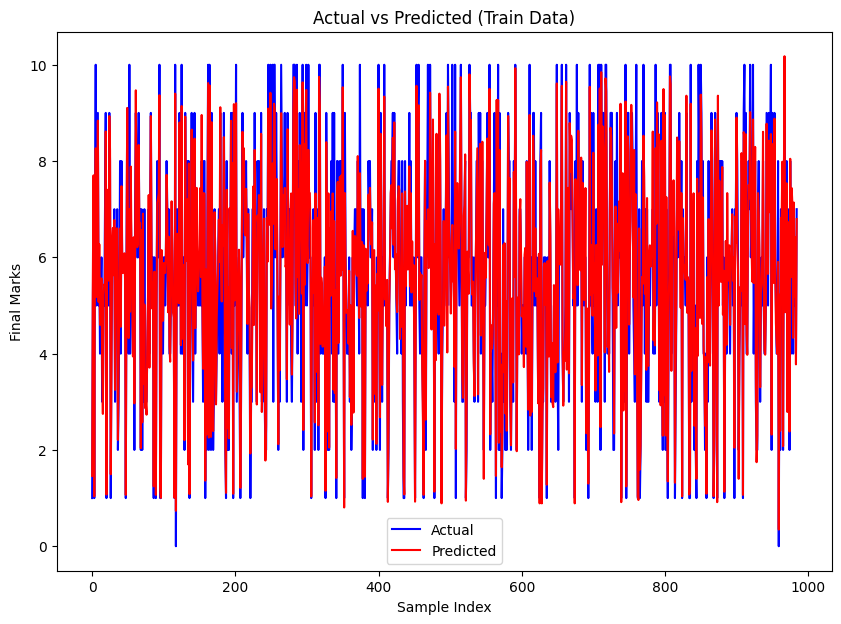

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

# Load the PCA dataset
file_path = 'pca.xlsx'  
df = pd.read_excel(file_path)

# Extract features and target from the dataframe
keywords_columns = [col for col in df.columns if "Keywords_Vector_" in col]
custom_data_columns = [col for col in df.columns if "Custom_Data_Structures_Vector_" in col]
target_column = 'Final_Marks'  

X_keywords = df[keywords_columns].values
X_custom_data = df[custom_data_columns].values
y = df[target_column].values

X_keywords_scaled = 1 * X_keywords  
X_custom_data_scaled = 1 * X_custom_data  

X_scaled = X_keywords_scaled + X_custom_data_scaled  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor with the given hyperparameters
model = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    verbose=0
)

def safe_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    nonzero_indices = y_true != 0  # Exclude zero values from calculation
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
# Fit the model
model.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = safe_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = safe_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 7))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Train Data
plt.figure(figsize=(10, 7))
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Train Data)')
plt.legend()
plt.show()


IG Concatenate

Training Metrics:
MAE: 0.4370463071885464
MSE: 0.5162907675848117
RMSE: 0.7185337623137912
MAPE: 9.103500599223718
R2: 0.9115279984577618

Testing Metrics:
MAE: 1.3132452342993144
MSE: 2.872040556759904
RMSE: 1.6947095788836222
MAPE: 36.855609029478245
R2: 0.5211015509717205


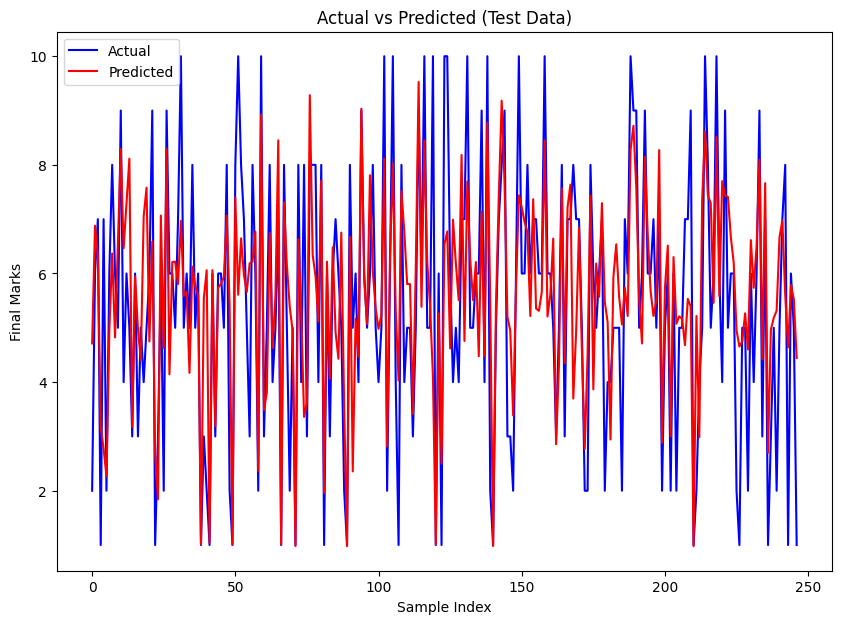

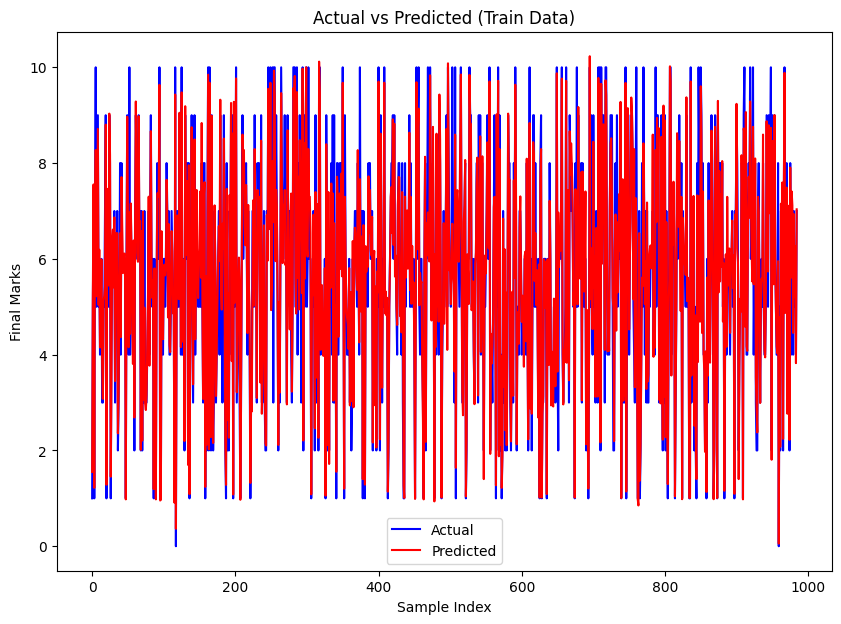

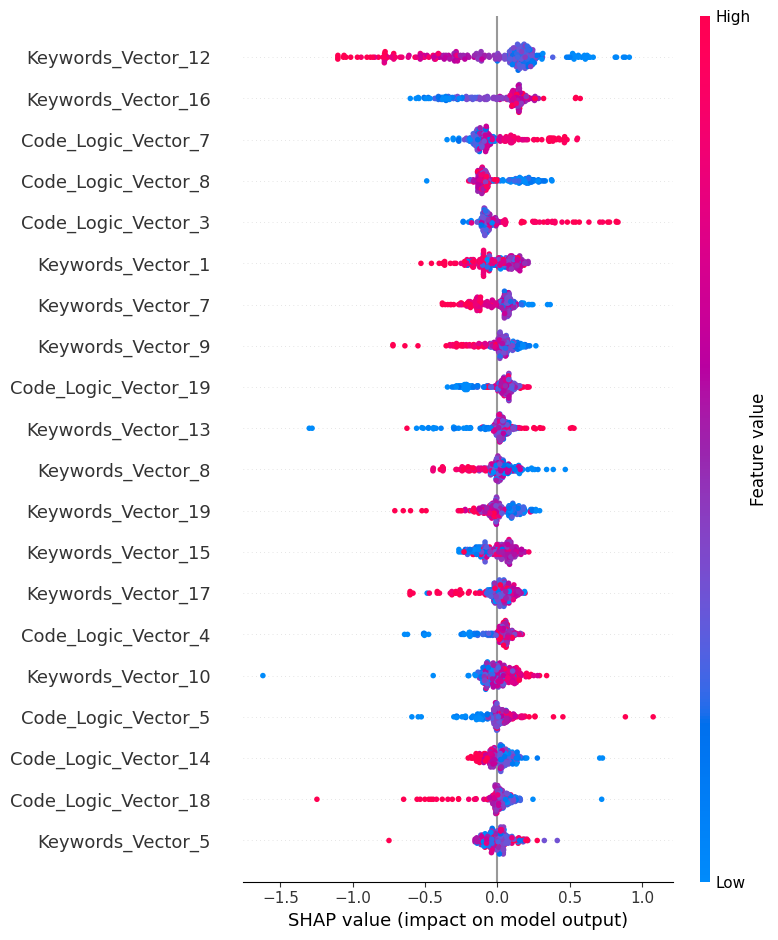

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from math import sqrt
import shap
from lime.lime_tabular import LimeTabularExplainer

# Load the PCA dataset
file_path = 'IG2.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Extract features and target from the dataframe
keywords_columns = [col for col in df.columns if "Keywords_Vector_" in col]
custom_data_columns = [col for col in df.columns if "Code_Logic_Vector_" in col]
target_column = 'Final_Marks'  # Replace with your actual target column name

X_keywords = df[keywords_columns].values
X_custom_data = df[custom_data_columns].values
y = df[target_column].values

# Apply weight scaling to the two components directly (no standardization)
X_keywords_scaled = 0.9 * X_keywords  # Keywords scaled by 0.9
X_custom_data_scaled = 0.1 * X_custom_data  # Custom Data Structures scaled by 0.1

# Concatenate the two scaled datasets
X_scaled = np.hstack([X_keywords_scaled, X_custom_data_scaled])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def safe_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    nonzero_indices = y_true != 0  # Exclude zero values from calculation
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
# Initialize the CatBoost Regressor with the given hyperparameters
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    verbose=0
)

# Fit the model
model.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = safe_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = safe_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 7))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Train Data
plt.figure(figsize=(10, 7))
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Train Data)')
plt.legend()
plt.show()

# SHAP - Model Explanation
# Explain the model with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])

# LIME - Local Explanation for Regression
# Create a LIME explainer object for regression (ensure regression mode is used)
explainer_lime = LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns[:-1],
    mode='regression'  # Specify that it's a regression model
)

# Choose a test instance to explain
i = 1  # Just choose the first instance, you can loop through others
explanation = explainer_lime.explain_instance(X_test[i], model.predict)

# Show the LIME explanation for this instance
explanation.show_in_notebook()



Training Metrics:
MAE: 0.44824591540280023
MSE: 0.5253810310247244
RMSE: 0.7248317260059223
MAPE: 9.276709512557677
R2: 0.9099702835971272

Testing Metrics:
MAE: 1.3213420132612088
MSE: 2.934868050676843
RMSE: 1.7131456595038388
MAPE: 38.231534042458264
R2: 0.5106253794837038


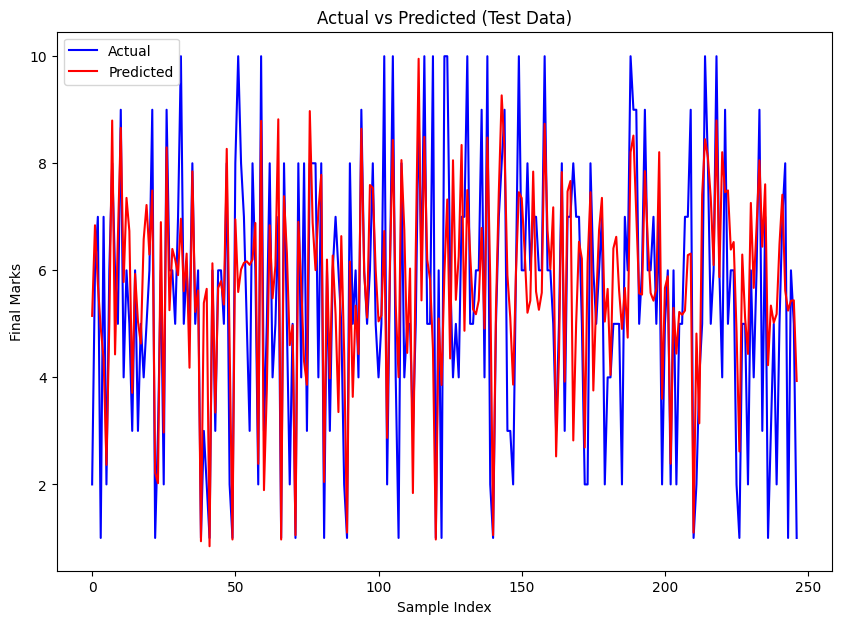

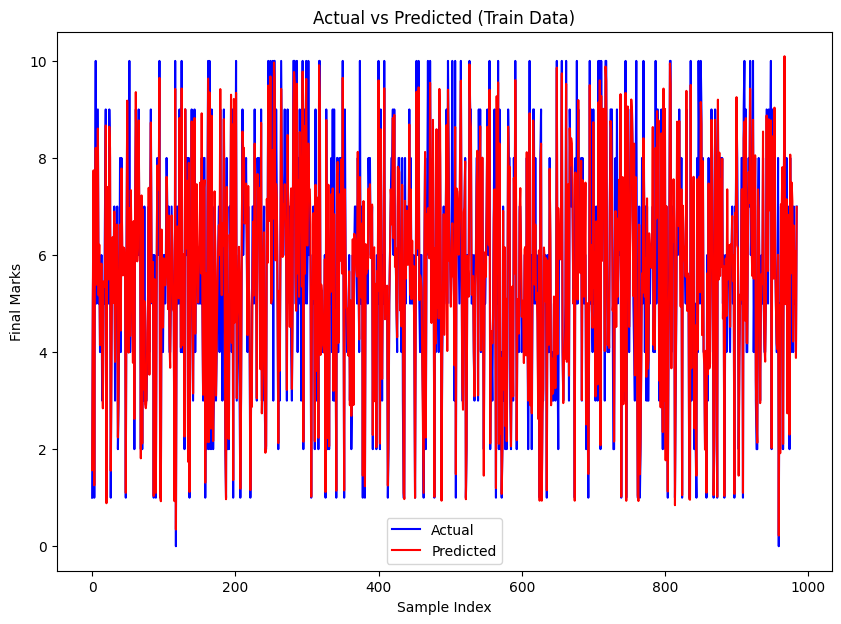

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

# Load the PCA dataset
file_path = 'IG.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Extract features and target from the dataframe
keywords_columns = [col for col in df.columns if "Keywords_Vector_" in col]
custom_data_columns = [col for col in df.columns if "Custom_Data_Structures_Vector_" in col]
target_column = 'Final_Marks'  # Replace with your actual target column name

X_keywords = df[keywords_columns].values
X_custom_data = df[custom_data_columns].values
y = df[target_column].values

# Apply weight scaling to the two components directly (no standardization)
X_keywords_scaled = 0.9 * X_keywords  # Keywords scaled by 0.9
X_custom_data_scaled = 0.1 * X_custom_data  # Custom Data Structures scaled by 0.1

# Concatenate the two scaled datasets (Addition Fusion)
X_scaled = X_keywords_scaled + X_custom_data_scaled  # Addition Fusion

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor with the given hyperparameters
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    verbose=0
)

def safe_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    nonzero_indices = y_true != 0  # Exclude zero values from calculation
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
# Fit the model
model.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = safe_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = safe_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 7))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Train Data
plt.figure(figsize=(10, 7))
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Train Data)')
plt.legend()
plt.show()


Training Metrics:
MAE: 0.4059889019271738
MSE: 0.49089795210678916
RMSE: 0.7006411007832678
MAPE: 8.406307844254151
R2: 0.9158793317590382

Testing Metrics:
MAE: 1.3465271954961817
MSE: 3.0870911234580265
RMSE: 1.757011987283532
MAPE: 39.66167695001171
R2: 0.48524294075398433


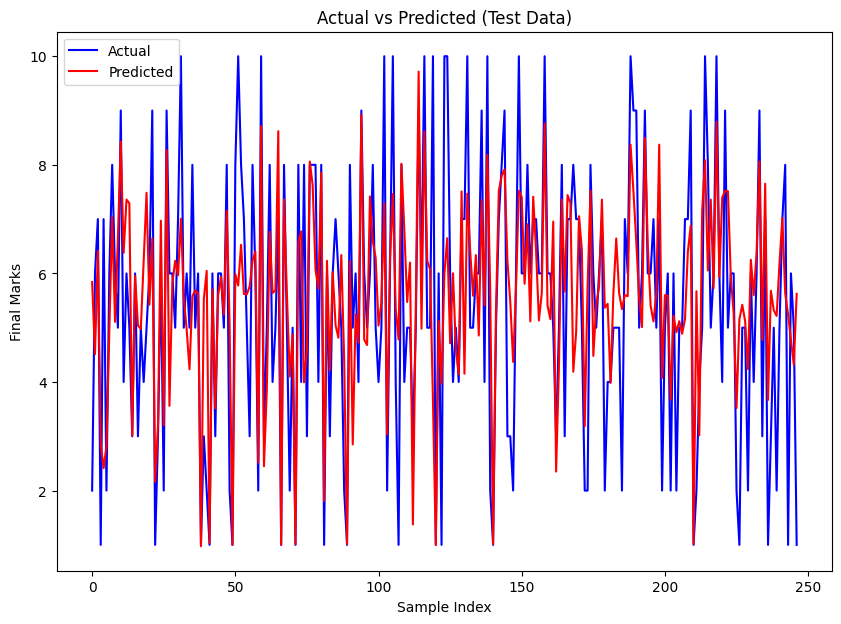

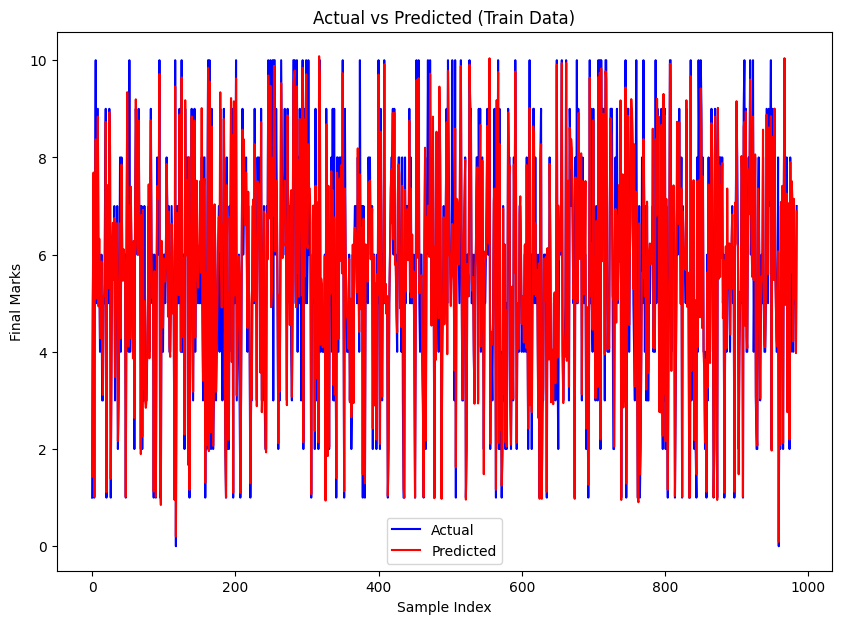

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

# Load the PCA dataset
file_path = 'IG.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Extract features and target from the dataframe
keywords_columns = [col for col in df.columns if "Keywords_Vector_" in col]
custom_data_columns = [col for col in df.columns if "Custom_Data_Structures_Vector_" in col]
target_column = 'Final_Marks'  # Replace with your actual target column name

X_keywords = df[keywords_columns].values
X_custom_data = df[custom_data_columns].values
y = df[target_column].values

# Apply weight scaling to the two components directly (no standardization)
X_keywords_scaled = 1 * X_keywords  # Keywords scaled by 0.9
X_custom_data_scaled = 1 * X_custom_data  # Custom Data Structures scaled by 0.1

# Concatenate the two scaled datasets (Addition Fusion)
X_scaled = X_keywords_scaled + X_custom_data_scaled  # Addition Fusion

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor with the given hyperparameters
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    verbose=0
)

def safe_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    nonzero_indices = y_true != 0  # Exclude zero values from calculation
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
# Fit the model
model.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = safe_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = safe_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 7))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Train Data
plt.figure(figsize=(10, 7))
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Train Data)')
plt.legend()
plt.show()


First 5 rows of unscaled concatenation fusion:
[[-0.0698883   0.0375388   0.06203328 -0.10472892 -0.0137833  -0.03163369
  -0.01861218  0.09321089 -0.01449091 -0.06552023  0.06263649 -0.10346865
  -0.06854531 -0.12737083  0.10991994 -0.01908447  0.00659707  0.04517905
   0.10718752 -0.12837578 -0.00943061 -0.01183763 -0.01717844  0.0120425
   0.10445274 -0.07484773  0.03917933  0.0249323  -0.04149985  0.03563625
   0.01407256  0.05995697 -0.00881797 -0.10540058 -0.11613986  0.06043505
   0.0203477  -0.05010518  0.02986037  0.03295955]
 [-0.06262784  0.08546298  0.05762192 -0.0864068   0.0046956  -0.03597672
   0.01098285  0.07573744 -0.02738815 -0.06073531  0.07663114 -0.09421042
  -0.04613661 -0.06921981  0.10874552 -0.0057274   0.00767762  0.03510643
   0.12843721 -0.14104532 -0.01176133 -0.01124386 -0.02972657  0.01792063
   0.11253556 -0.07824602  0.03128434  0.01351304 -0.04978213  0.0328665
   0.00676188  0.06370361 -0.0094831  -0.10349776 -0.11933245  0.0568512
   0.01765089 -0.

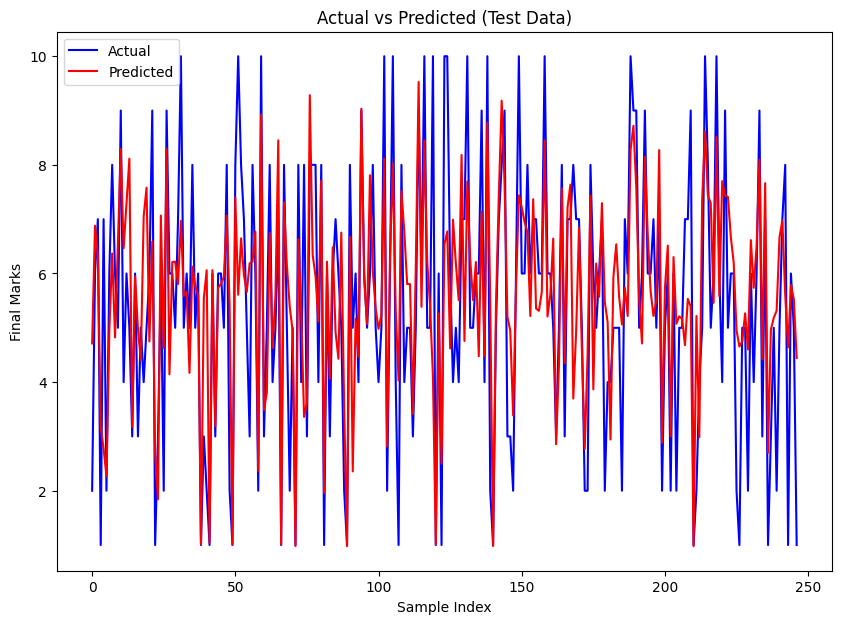

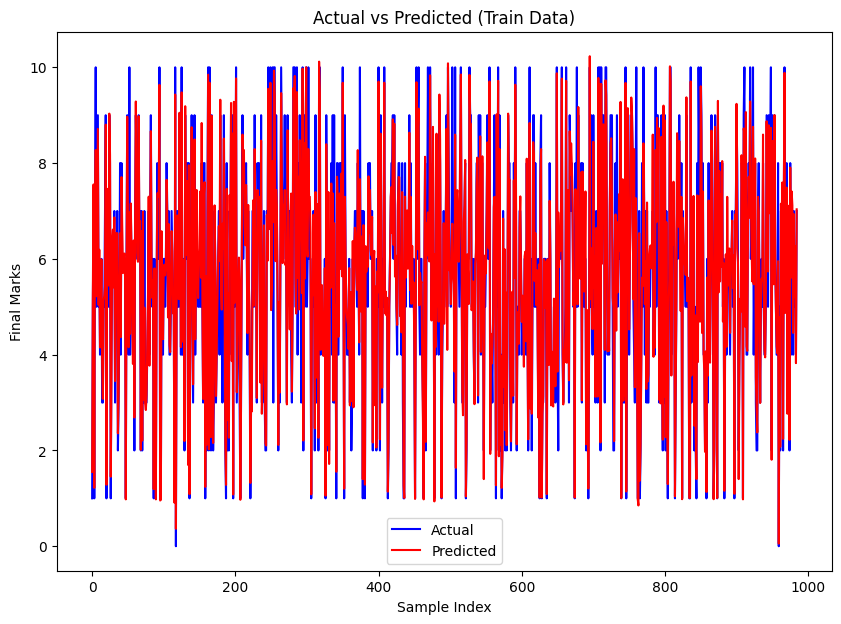

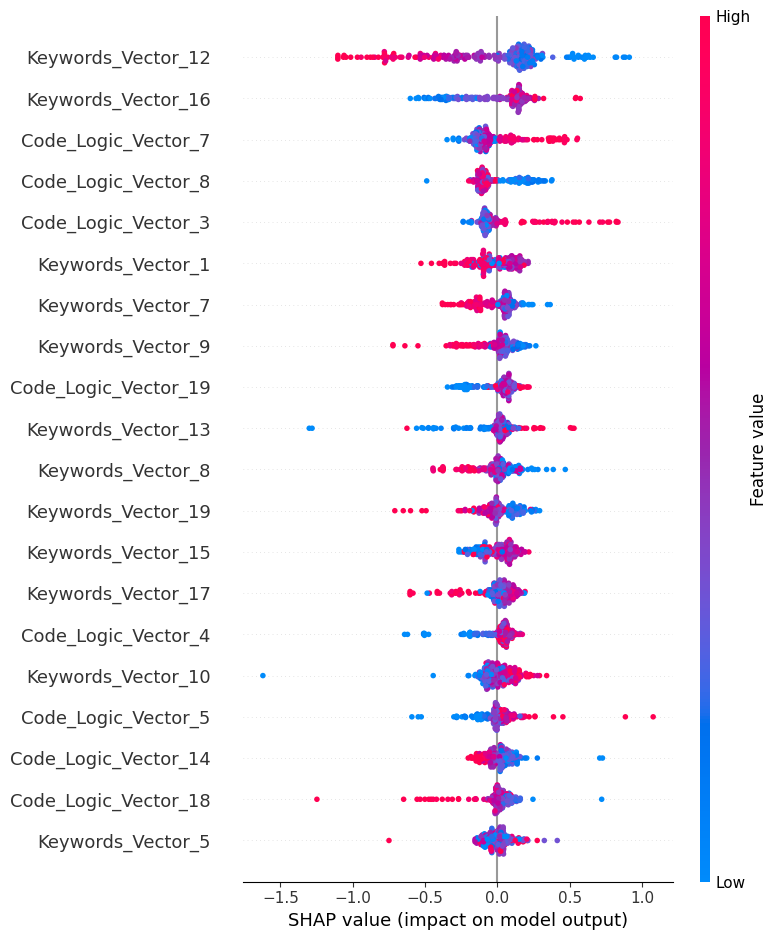

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from math import sqrt
import shap
from lime.lime_tabular import LimeTabularExplainer

# Load the PCA dataset
file_path = 'IG2.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Extract features and target from the dataframe
keywords_columns = [col for col in df.columns if "Keywords_Vector_" in col]
custom_data_columns = [col for col in df.columns if "Code_Logic_Vector_" in col]
target_column = 'Final_Marks'  # Replace with your actual target column name

X_keywords = df[keywords_columns].values
X_custom_data = df[custom_data_columns].values
y = df[target_column].values

# Print the first few rows of unscaled concatenation fusion
X_unscaled = np.hstack([X_keywords, X_custom_data])
print("First 5 rows of unscaled concatenation fusion:")
print(X_unscaled[:5])

# Apply weight scaling to the two components directly (no standardization)
X_keywords_scaled = 0.9 * X_keywords 
X_custom_data_scaled = 0.1 * X_custom_data  

# Concatenate the two scaled datasets
X_scaled = np.hstack([X_keywords_scaled, X_custom_data_scaled])

# Print the first few rows of scaled concatenation fusion
print("First 5 rows of scaled concatenation fusion (0.9 and 0.1 weights):")
print(X_scaled[:5])

# Trial with extreme weights
extreme_keywords_scaled = 0.01 * X_keywords
extreme_custom_data_scaled = 900 * X_custom_data
X_extreme_scaled = np.hstack([extreme_keywords_scaled, extreme_custom_data_scaled])

print("First 5 rows of scaled concatenation fusion (extreme weights: 10 and 0.01):")
print(X_extreme_scaled[:5])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function for safe MAPE calculation
def safe_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    nonzero_indices = y_true != 0  # Exclude zero values from calculation
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100

# Initialize the CatBoost Regressor with the given hyperparameters
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    l2_leaf_reg=5,
    early_stopping_rounds=15,
    verbose=0
)

# Fit the model
model.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mape_train = safe_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mape_test = safe_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 7))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Train Data
plt.figure(figsize=(10, 7))
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Final Marks')
plt.title('Actual vs Predicted (Train Data)')
plt.legend()
plt.show()

# SHAP - Model Explanation
# Explain the model with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])

# LIME - Local Explanation for Regression
# Create a LIME explainer object for regression (ensure regression mode is used)
explainer_lime = LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns[:-1],
    mode='regression'  # Specify that it's a regression model
)

# Choose a test instance to explain
i = 1  # Just choose the first instance, you can loop through others
explanation = explainer_lime.explain_instance(X_test[i], model.predict)

# Show the LIME explanation for this instance
explanation.show_in_notebook()
